In [1]:
# Main.py
import my_module as mod
import plot
import numpy as np
import data_loader

# загрузка данных
dataF = mod.load_dataF('pizza_data.csv', 'Price')

# получение информации о датасете
mod.statistic_dataF(dataF)

Данные успешно загружены и разделены.
Матрица признаков X:
            Company           Pizza Name              Type           Size
0    Domino's Pizza          Hand Tossed     Cheeses Pizza    Small (10")
1    Domino's Pizza          Hand Tossed     Cheeses Pizza   Medium (12")
2    Domino's Pizza          Hand Tossed     Cheeses Pizza    Large (14")
3    Domino's Pizza         Handmade Pan     Cheeses Pizza   Medium (12")
4    Domino's Pizza   Crunchy Thin Crust     Cheeses Pizza    Small (10")
..              ...                  ...               ...            ...
366     IMO's Pizza    BBQ Chicken Pizza  Specialty Pizzas  X Large (16")
367     IMO's Pizza  Egg-Ceptional Pizza  Specialty Pizzas    Small (10")
368     IMO's Pizza  Egg-Ceptional Pizza  Specialty Pizzas   Medium (12")
369     IMO's Pizza  Egg-Ceptional Pizza  Specialty Pizzas    Large (14")
370     IMO's Pizza  Egg-Ceptional Pizza  Specialty Pizzas  X Large (16")

[371 rows x 4 columns]

Целевая переменная y:
0     

In [2]:
# кодируем категориальные значения числом
mod.encoder (dataF, ["Company", "Pizza Name", "Type", "Size"])

In [3]:
# Удаляем символы валюты и запятые
dataF['Price'] = dataF['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [4]:
# вывод типов данных
print(dataF.dtypes)

Company                  object
Pizza Name               object
Type                     object
Size                     object
Price                   float64
Company (Encoded)         int64
Pizza Name (Encoded)      int64
Type (Encoded)            int64
Size (Encoded)            int64
dtype: object


In [5]:
# вывод статистической информации
mod.statistic_dataF(dataF)

          Company          Pizza Name           Type          Size  Price  \
0  Domino's Pizza         Hand Tossed  Cheeses Pizza   Small (10")   5.99   
1  Domino's Pizza         Hand Tossed  Cheeses Pizza  Medium (12")   7.99   
2  Domino's Pizza         Hand Tossed  Cheeses Pizza   Large (14")   9.99   
3  Domino's Pizza        Handmade Pan  Cheeses Pizza  Medium (12")   7.99   
4  Domino's Pizza  Crunchy Thin Crust  Cheeses Pizza   Small (10")   5.99   

   Company (Encoded)  Pizza Name (Encoded)  Type (Encoded)  Size (Encoded)  
0                  0                    96               1               8  
1                  0                    96               1               4  
2                  0                    96               1               2  
3                  0                    98               1               4  
4                  0                    75               1               8  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Da

In [6]:
# посчитаем количество пустых в столбцах
mod.count_missing_values(dataF) 

Company                 0
Pizza Name              0
Type                    0
Size                    0
Price                   0
Company (Encoded)       0
Pizza Name (Encoded)    0
Type (Encoded)          0
Size (Encoded)          0
dtype: int64


In [7]:
'''  пустых нет
     поэтому найдем максимальную цену и заменим ее на null
'''
# вычисляем максимальное значение в колонке
maxPrice = mod.max_in_column(dataF,'Price')
print(f" максимальная цена: {maxPrice}")

# заменяем максимальное значение в колонке на NaN
dataF.replace({'Price': maxPrice}, np.nan, inplace=True)


 максимальная цена: 29.99


In [8]:
# проверим замену на null
mod.count_missing_values(dataF)  # есть пустые

Company                 0
Pizza Name              0
Type                    0
Size                    0
Price                   4
Company (Encoded)       0
Pizza Name (Encoded)    0
Type (Encoded)          0
Size (Encoded)          0
dtype: int64


In [9]:
mod.replace_nan_to_mean(dataF, 'Price')
# проверим
mod.count_missing_values(dataF)  # нет пустых

Company                 0
Pizza Name              0
Type                    0
Size                    0
Price                   0
Company (Encoded)       0
Pizza Name (Encoded)    0
Type (Encoded)          0
Size (Encoded)          0
dtype: int64


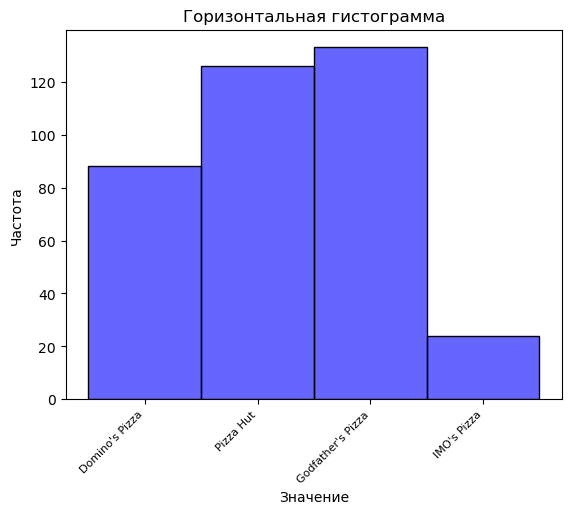

In [10]:
# построение гистограммы частоты повторений
plot.hist(dataF, "Company")

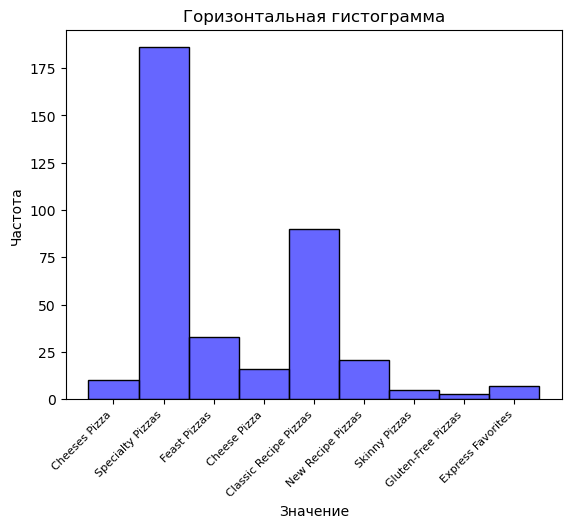

In [11]:
plot.hist(dataF, "Type")

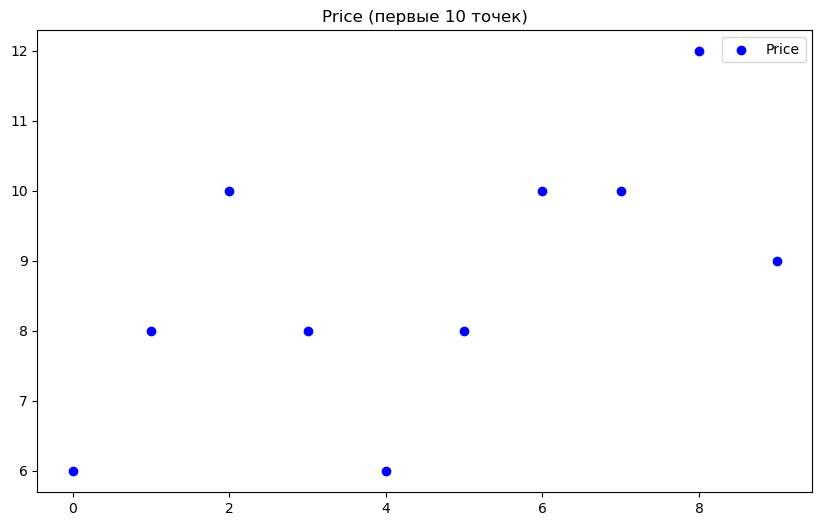

In [12]:
plot.scatter (dataF, 'Price', 10)

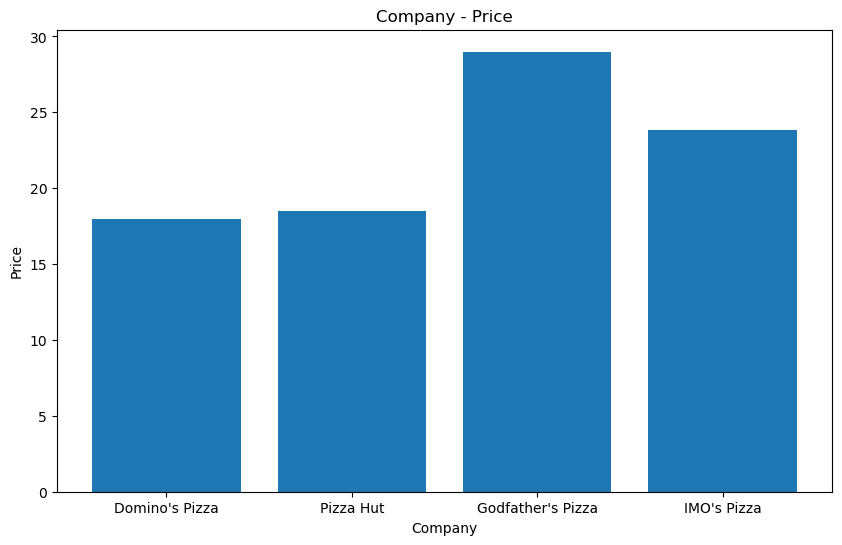

In [13]:
plot.bar (dataF, 'Company', 'Price')

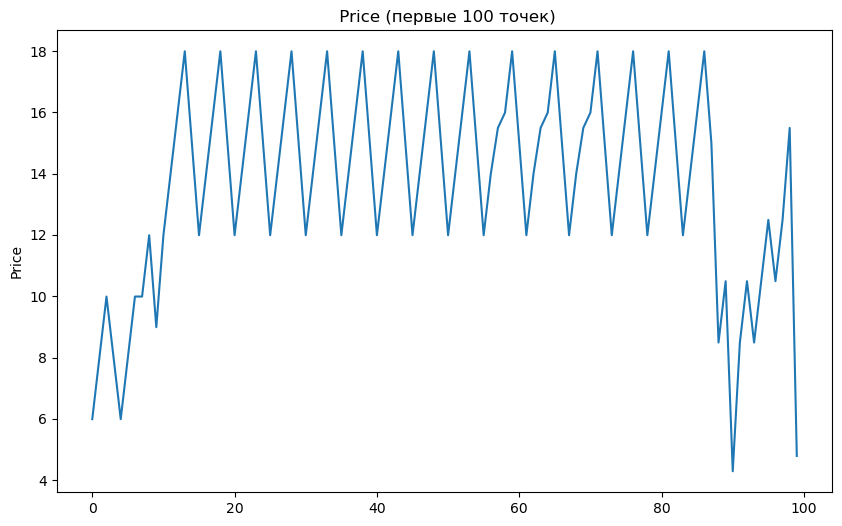

In [14]:
plot.plot (dataF, 'Price')